In [49]:
from datetime import datetime

# Time Series with Pandas

## DateTime Index

In [50]:
my_year = 2021
my_month = 4
my_day = 16
my_hour = 19
my_min = 39
my_sec = 15

In [51]:
my_date = datetime(my_year, my_month, my_day)

In [52]:
my_date

datetime.datetime(2021, 4, 16, 0, 0)

In [53]:
my_date_time = datetime(my_year, my_month, my_day, my_hour, my_min, my_sec)

In [54]:
my_date_time

datetime.datetime(2021, 4, 16, 19, 39, 15)

In [55]:
my_date_time.hour

19

In [56]:
import numpy as np

In [57]:
np.array(['2021-04-08','2021-04-14','2021-04-22'], dtype='datetime64')

array(['2021-04-08', '2021-04-14', '2021-04-22'], dtype='datetime64[D]')

In [58]:
np.array(['2021-04-08','2021-04-14','2021-04-22'], dtype='datetime64[M]')

array(['2021-04', '2021-04', '2021-04'], dtype='datetime64[M]')

In [59]:
np.arange(0,10,2)

array([0, 2, 4, 6, 8])

In [60]:
np.arange('2021-01-01', '2021-01-30', 7, dtype='datetime64[D]')

array(['2021-01-01', '2021-01-08', '2021-01-15', '2021-01-22',
       '2021-01-29'], dtype='datetime64[D]')

In [61]:
np.arange('1956', '1962', dtype='datetime64[Y]')

array(['1956', '1957', '1958', '1959', '1960', '1961'],
      dtype='datetime64[Y]')

We have see that numpy has a different aproach to the datetime problem. This aproach is the one used by Pandas

In [62]:
import pandas as pd

In [63]:
pd.date_range('2021', periods=7, freq='D')

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07'],
              dtype='datetime64[ns]', freq='D')

In [64]:
pd.to_datetime(['01/01/2021', '02/01/2021'])

DatetimeIndex(['2021-01-01', '2021-02-01'], dtype='datetime64[ns]', freq=None)

In [65]:
pd.to_datetime(['01/01/2021', '02/01/2021'], format='%d/%m/%Y')

DatetimeIndex(['2021-01-01', '2021-01-02'], dtype='datetime64[ns]', freq=None)

In [66]:
data = np.random.randn(3,2)
cols=['A', 'B']
print(data)

[[ 0.5592564   0.64158033]
 [-0.36296577 -0.89099086]
 [ 0.85110464  1.53977918]]


In [67]:
idx = pd.date_range('2021-04-01', periods=3, freq='D')
df = pd.DataFrame(data, index=idx, columns=cols)
df

,A,B
2021-04-01,0.559256,0.641580
2021-04-02,-0.362966,-0.890991
2021-04-03,0.851105,1.539779


In [68]:
df.index.max()

Timestamp('2021-04-03 00:00:00', freq='D')

In [69]:
df.index.argmax()

2

In [70]:
df.index.min()

Timestamp('2021-04-01 00:00:00', freq='D')

In [71]:
df.index.argmin()

0

## Time resampling
The general idea is to do a group by date with aditional functions

In [72]:
import pandas as pd

In [73]:
file = './data/starbucks.csv'

In [74]:
df = pd.read_csv(file, index_col='Date', parse_dates=True)
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [75]:
df.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

In [76]:
# daily ----> yearly
df.resample('A').sum()

,Close,Volume
Date,,
2015-12-31,12619.6811,2179595896
2016-12-31,13580.7164,2343759515
2017-12-31,13919.7849,2333315537
2018-12-31,14274.3712,2818435669


In [77]:
df.resample('A').mean()

,Close,Volume
Date,,
2015-12-31,50.078100,8.649190e+06
2016-12-31,53.891732,9.300633e+06
2017-12-31,55.457310,9.296078e+06
2018-12-31,56.870005,1.122883e+07


In [78]:
def first_day(entry):
    print("LN", len(entry))
    if len(entry):
        return entry[0]

In [79]:
df.resample('A').apply(first_day)

LN 252
LN 252
LN 251
LN 251
LN 252
LN 252
LN 251
LN 251


,Close,Volume
Date,,
2015-12-31,38.0061,6906098
2016-12-31,55.0780,13521544
2017-12-31,53.1100,7809307
2018-12-31,56.3243,7215978


In [80]:
# As we can see it returns the first day of the period
df.loc[(df.index == '2016-01-04')]

,Close,Volume
Date,,
2016-01-04,55.078,13521544


<AxesSubplot:title={'center':'Year mean closing price for StarBucks'}, xlabel='Date'>

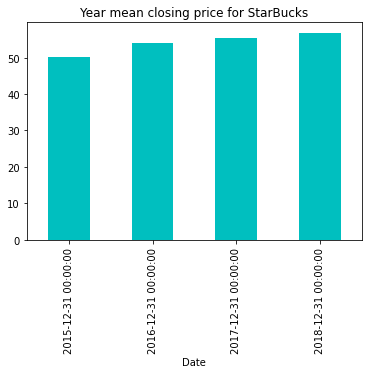

In [81]:
title = "Year mean closing price for StarBucks"
df['Close'].resample('A').mean().plot.bar(title=title, color='c')

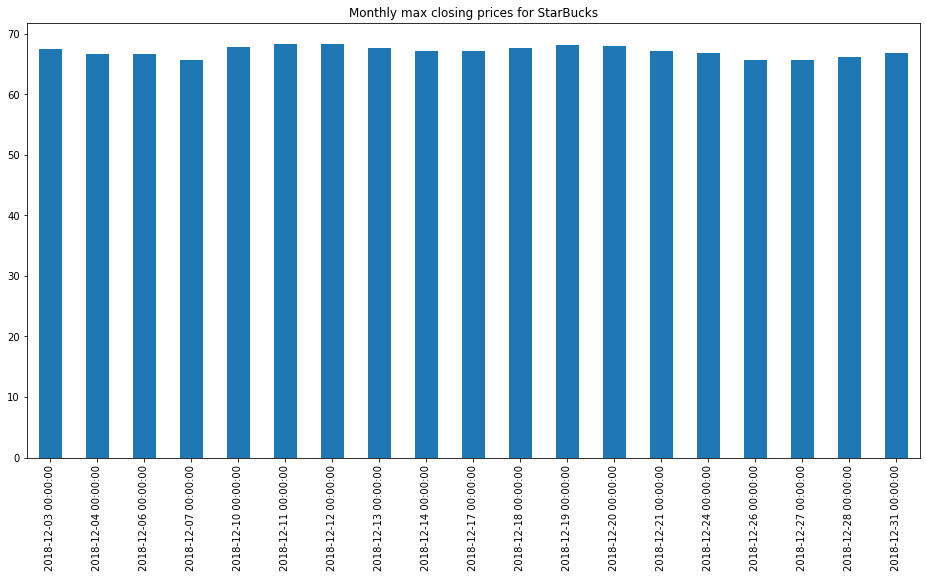

In [82]:
title="Monthly max closing prices for StarBucks"
df["Close"].resample('M').plot.bar(title=title, figsize=(16,8));

## Time shifting

In [83]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [84]:
df.tail()

,Close,Volume
Date,,
2018-12-24,60.56,6323252
2018-12-26,63.08,16646238
2018-12-27,63.20,11308081
2018-12-28,63.39,7712127
2018-12-31,64.40,7690183


In [85]:
print(df.shift(1).head()) 
print(df.shift(1).tail())

              Close      Volume
Date                           
2015-01-02      NaN         NaN
2015-01-05  38.0061   6906098.0
2015-01-06  37.2781  11623796.0
2015-01-07  36.9748   7664340.0
2015-01-08  37.8848   9732554.0
            Close      Volume
Date                         
2018-12-24  61.39  23524888.0
2018-12-26  60.56   6323252.0
2018-12-27  63.08  16646238.0
2018-12-28  63.20  11308081.0
2018-12-31  63.39   7712127.0


In [86]:
df.shift(-1)

,Close,Volume
Date,,
2015-01-02,37.2781,11623796.0
2015-01-05,36.9748,7664340.0
2015-01-06,37.8848,9732554.0
2015-01-07,38.4961,13170548.0
2015-01-08,37.2361,27556706.0
...,...,...
2018-12-24,63.0800,16646238.0
2018-12-26,63.2000,11308081.0
2018-12-27,63.3900,7712127.0


In [87]:
df

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548
...,...,...
2018-12-24,60.5600,6323252
2018-12-26,63.0800,16646238
2018-12-27,63.2000,11308081


In [88]:
df.shift(periods=1, freq='M')

,Close,Volume
Date,,
2015-01-31,38.0061,6906098
2015-01-31,37.2781,11623796
2015-01-31,36.9748,7664340
2015-01-31,37.8848,9732554
2015-01-31,38.4961,13170548
...,...,...
2018-12-31,60.5600,6323252
2018-12-31,63.0800,16646238
2018-12-31,63.2000,11308081


## Rolling and expandig

In [89]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


<AxesSubplot:xlabel='Date'>

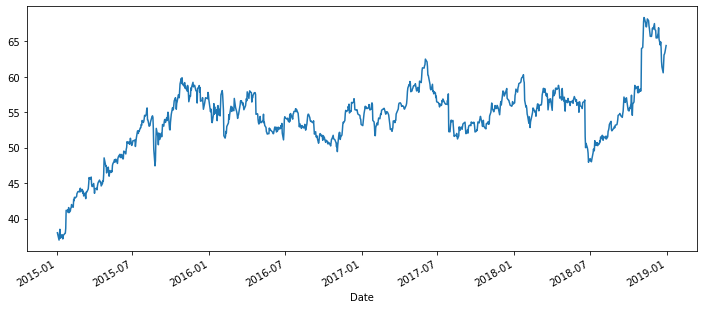

In [90]:
df['Close'].plot(figsize=(12,5))

In [91]:
df.rolling(window=7).mean()

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,NaN,NaN
2015-01-06,NaN,NaN
2015-01-07,NaN,NaN
2015-01-08,NaN,NaN
...,...,...
2018-12-24,63.270000,1.528625e+07
2018-12-26,62.947143,1.525942e+07
2018-12-27,62.765714,1.471157e+07


<AxesSubplot:xlabel='Date'>

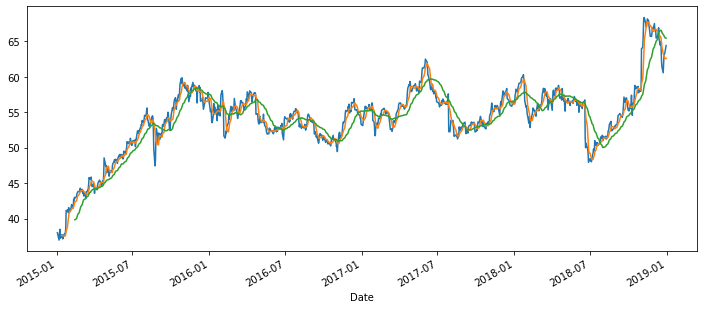

In [92]:
df['Close'].plot(figsize=(12,5))
df['Close'].rolling(7).mean().plot()
df['Close'].rolling(30).mean().plot()

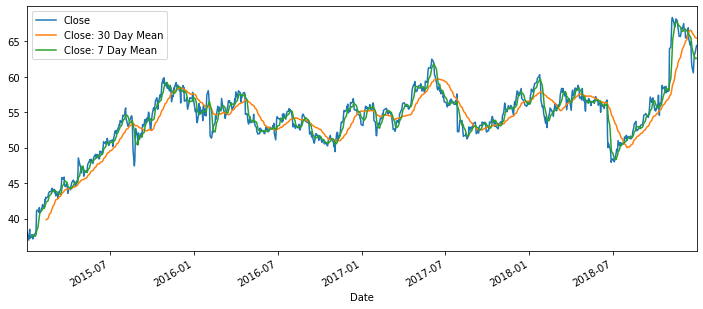

In [93]:
df['Close: 7 Day Mean'] = df['Close'].rolling(window=7).mean()
df['Close: 30 Day Mean'] = df['Close'].rolling(window=30).mean()
df[['Close','Close: 30 Day Mean','Close: 7 Day Mean']].plot(figsize=(12,5)).autoscale(axis='x',tight=True);

In [95]:
df

,Close,Volume,Close: 7 Day Mean,Close: 30 Day Mean
Date,,,,
2015-01-02,38.0061,6906098,NaN,NaN
2015-01-05,37.2781,11623796,NaN,NaN
2015-01-06,36.9748,7664340,NaN,NaN
2015-01-07,37.8848,9732554,NaN,NaN
2015-01-08,38.4961,13170548,NaN,NaN
...,...,...,...,...
2018-12-24,60.5600,6323252,63.270000,65.963703
2018-12-26,63.0800,16646238,62.947143,65.791913
2018-12-27,63.2000,11308081,62.765714,65.647000


<AxesSubplot:xlabel='Date'>

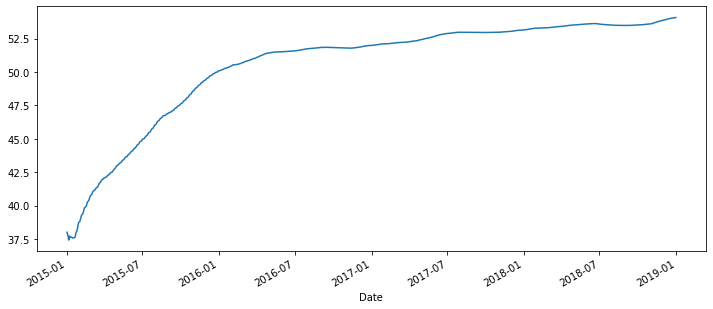

In [97]:
# Expanding
df['Close'].expanding().mean().plot(figsize=(12,5))

## Visualizing Time Series Data

In [98]:
import pandas as pd
file = './data/starbucks.csv'
df = pd.read_csv(file, index_col='Date', parse_dates=True)
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


<AxesSubplot:xlabel='Date'>

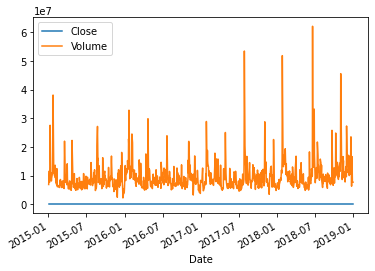

In [99]:
df.plot()

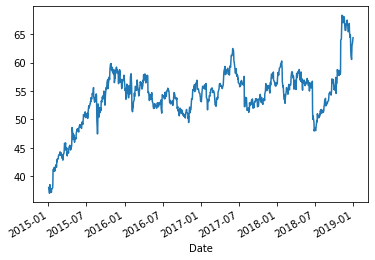

In [100]:
df['Close'].plot();

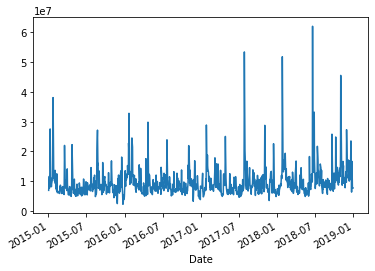

In [101]:
df['Volume'].plot();

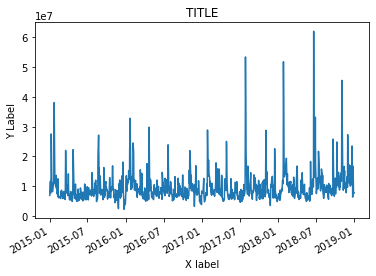

In [102]:
title = "TITLE"
ylabel = "Y Label"
xlabel = "X label"
df['Volume'].plot(title=title, ylabel = ylabel, xlabel=xlabel);

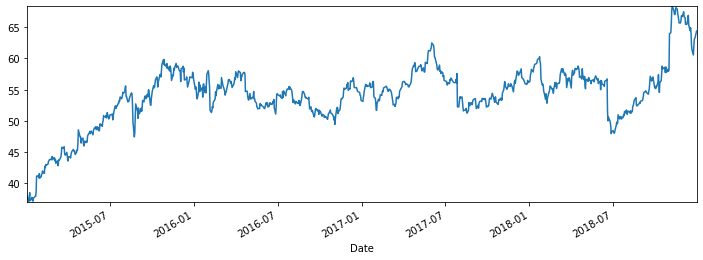

In [106]:
df['Close'].plot(figsize=(12,4)).autoscale(tight=True)

<AxesSubplot:xlabel='Date'>

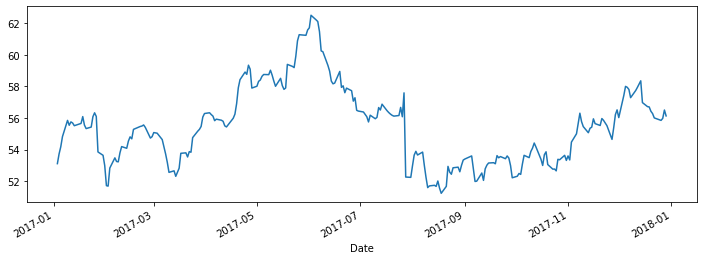

In [111]:
#Select only one year to plot
df[df.index.year == 2017]['Close'].plot(figsize=(12,4))

<AxesSubplot:xlabel='Date'>

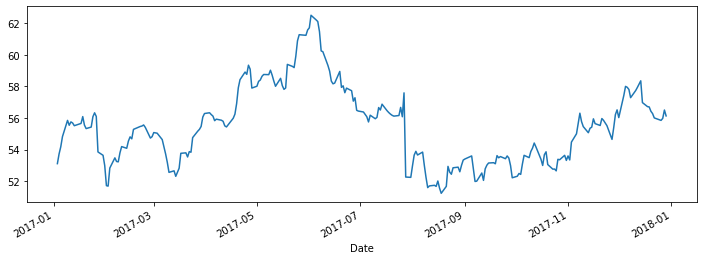

In [114]:
# Another way to do it
df['Close']['2017-01-01':'2017-12-31'].plot(figsize=(12,4))

<AxesSubplot:xlabel='Date'>

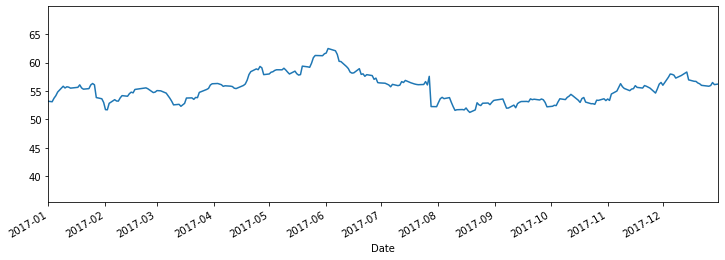

In [115]:
# Another way, this time inside the plot
df['Close'].plot(figsize=(12,4), xlim=('2017-01-01','2017-12-31'))

<AxesSubplot:xlabel='Date'>

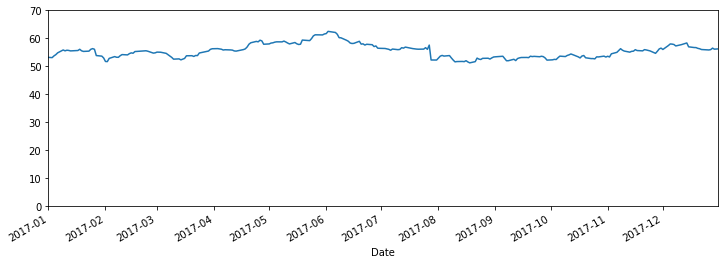

In [125]:
df['Close'].plot(figsize=(12,4), xlim=('2017-01-01','2017-12-31'), ylim=(0,70))

In [127]:
df[df.index.year == 2017]['Close'].max()

62.4924

In [128]:
df[df.index.year == 2017]['Close'].min()

51.2345

<AxesSubplot:xlabel='Date'>

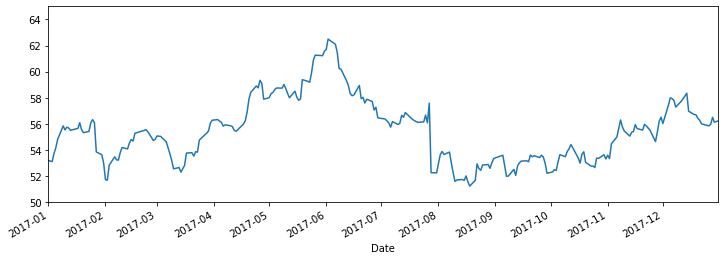

In [129]:
df['Close'].plot(figsize=(12,4), xlim=('2017-01-01','2017-12-31'), ylim=(50,65))

In [130]:
from matplotlib import dates

<AxesSubplot:xlabel='Date'>

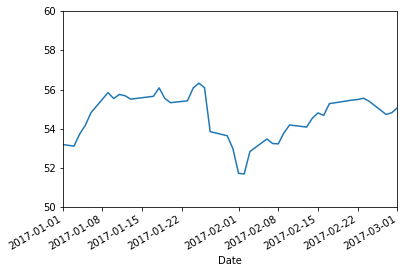

In [132]:
df['Close'].plot(xlim=['2017-01-01', '2017-03-01'], ylim=[50,60])

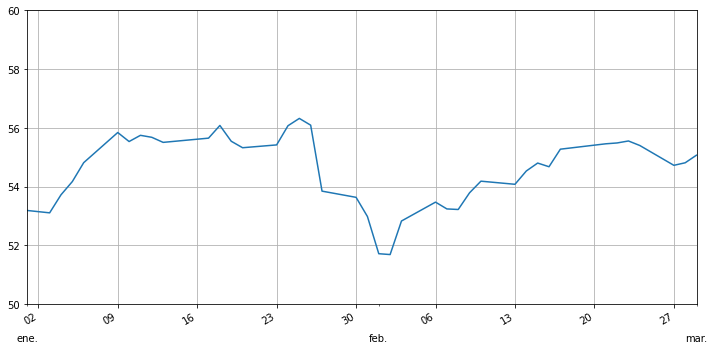

In [148]:
import locale
locale.setlocale(locale.LC_ALL,'es_ES')

ax = df['Close'].plot(xlim=['2017-01-01', '2017-03-01'], ylim=[50,60], figsize=(12,6))
ax.set(xlabel='')
ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))
ax.xaxis.set_major_formatter(dates.DateFormatter('%d'))

ax.xaxis.set_minor_locator(dates.MonthLocator())
ax.xaxis.set_minor_formatter(dates.DateFormatter('\n\n%b'))

ax.yaxis.grid(True)
ax.xaxis.grid(True)